# SAMPLING IN PYTHON

Course offered by: DataCamp

By: Mokete Mashala

Date: January 2023

Sampling in Python is the cornerstone of inference statistics and hypothesis testing. It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population. In this Sampling in Python course, you’ll discover when to use sampling and how to perform common types of sampling—from simple random sampling to more complex methods like stratified and cluster sampling. Using real-world datasets, including coffee ratings, Spotify songs, and employee attrition, you’ll learn to estimate population statistics and quantify uncertainty in your estimates by generating sampling distributions and bootstrap distributions.

In [56]:
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import random 
import itertools as it
import pandas as pd
import itertools
from scipy.stats import norm

In [2]:
file = "C:\\Users\\moket\\Personal Practice\\attrition.feather"
df = pd.read_feather(file)

In [3]:
#file = "C:\\PERSONAL\\02.1. MBAN Preparation\\Data Camp\\Python\\Sampling in python\\attrition.feather"
#attriation_pop = pd.read_feather(file)

In [4]:
attrition_pop = df

## Sampling Methods

### Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

attrition_pop is available; pandas as pd is loaded.

In [22]:
attrition_samp = attrition_pop.sample(n=70, random_state = 18900217 )
display(attrition_samp)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


### Systematic sampling
One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

attrition_pop is available; pandas has been pre-loaded as pd.

In [22]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)
print(pop_size )

# Calculate the interval
interval = pop_size // sample_size
print(interval )

1470
21


In [23]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
display(attrition_sys_samp)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


### Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

attrition_pop is available; pandas is loaded as pd, and matplotlib.pyplot as plt.

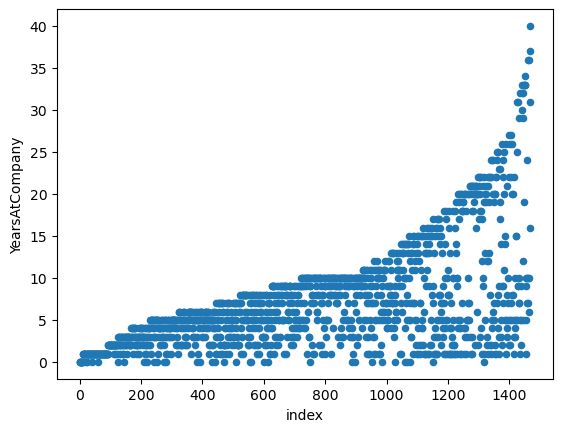

In [24]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x = "index", y = "YearsAtCompany", kind = "scatter")
plt.show()

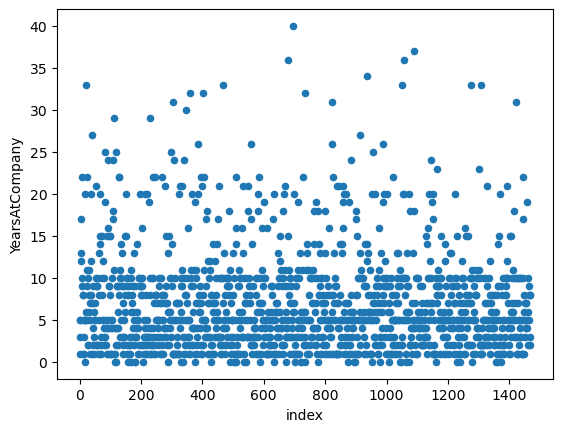

In [25]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

Systematic sample does not always produce a sample similar to a simple random sample? This is not true if the data is sorted in some way.

### Proportional stratified sampling
If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

attrition_pop is available; pandas is loaded with its usual alias.

In [26]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)
display(attrition_strat)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize = True)

# Print education_counts_strat
display(education_counts_strat)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,38,0.0,Travel_Frequently,653,Research_Development,29,Doctor,Life_Sciences,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,10,3,9,9
1061,44,0.0,Travel_Frequently,602,Human_Resources,1,Doctor,Human_Resources,Low,Male,...,Excellent,High,0,14,3,Better,10,7,0,2
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
1060,33,0.0,Travel_Rarely,516,Research_Development,8,Doctor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,14,6,Better,0,0,0,0


Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64

Perfectly proportioned! By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

### Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

attrition_pop is available; pandas is loaded with its usual alias.

### Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

attrition_pop is available; pandas is loaded with its usual alias.

In [27]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
    .sample(n=30, random_state=2022) 
display(attrition_eq)     

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize = True)

# Print the results
print(education_counts_eq)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,33,0.0,Travel_Rarely,922,Research_Development,1,Doctor,Medical,Low,Female,...,Excellent,High,1,10,2,Better,6,1,0,5
869,45,0.0,Travel_Rarely,1015,Research_Development,5,Doctor,Medical,High,Female,...,Excellent,Low,0,10,3,Better,10,7,1,4
530,32,0.0,Travel_Rarely,120,Research_Development,6,Doctor,Life_Sciences,High,Male,...,Outstanding,Low,0,8,2,Better,5,4,1,4
1049,48,0.0,Travel_Rarely,163,Sales,2,Doctor,Marketing,Medium,Female,...,Excellent,Low,1,14,2,Better,9,7,6,7


Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


Elegant equal count creation! If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.

### Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

attrition_pop is available; pandas, matplotlib.pyplot, and numpy are loaded with their usual aliases.

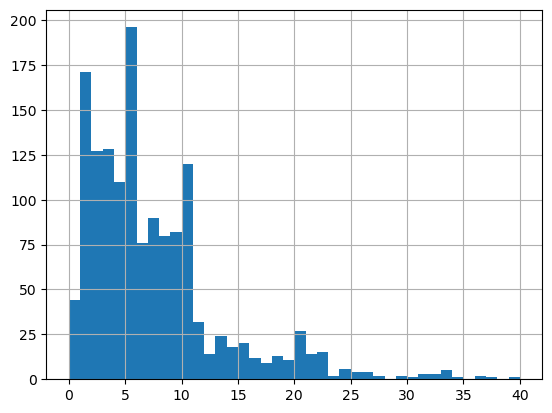

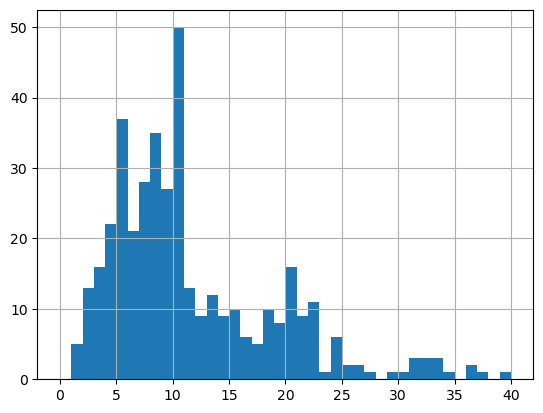

In [28]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins = np.arange(0,41,1))
plt.show()

In [29]:
print('Population mean:', attrition_pop['YearsAtCompany'].mean())

print('Sample mean:', attrition_weight['YearsAtCompany'].mean())

Population mean: 7.0081632653061225
Sample mean: 11.175


Marvelous means! The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

### Clustering

Benefits of clustering
Cluster sampling is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.
Collecting an overall sample requires lots of travel from one group to another to collect samples within each group.

The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.

In [30]:
seed = 19790801

###  Performing cluster sampling
Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the JobRole column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

In [31]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)
print(job_roles_samp)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
display(attrition_filtered)

['Laboratory_Technician', 'Research_Director', 'Human_Resources', 'Research_Scientist']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
5,27,0.0,Non-Travel,443,Research_Development,3,Bachelor,Medical,Very_High,Male,...,Excellent,High,3,0,6,Good,0,0,0,0
6,18,0.0,Non-Travel,287,Research_Development,5,College,Life_Sciences,Medium,Male,...,Excellent,Very_High,0,0,2,Better,0,0,0,0
7,18,1.0,Non-Travel,247,Research_Development,8,Below_College,Medical,High,Male,...,Excellent,Very_High,0,0,0,Better,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,55,0.0,Travel_Rarely,478,Research_Development,2,Bachelor,Medical,High,Male,...,Excellent,Medium,3,34,2,Better,1,0,0,0
1455,53,0.0,Travel_Rarely,447,Research_Development,2,Bachelor,Medical,Very_High,Male,...,Excellent,Medium,0,35,2,Good,9,8,8,8
1457,55,0.0,Travel_Rarely,692,Research_Development,14,Master,Medical,High,Male,...,Excellent,Very_High,0,36,3,Better,24,15,2,15
1459,54,0.0,Travel_Rarely,685,Research_Development,3,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,36,2,Better,10,9,0,9


In [32]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state = 2022)


# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1380   44        0.0      Travel_Rarely       1099                 Sales   
1395   46        0.0      Travel_Rarely        488                 Sales   
1300   42        0.0      Travel_Rarely        532  Research_Development   
1271   39        0.0      Travel_Rarely        117  Research_Development   
1354   42        0.0      Travel_Rarely       1059  Research_Development   
858    32        0.0      Travel_Rarely        495  Research_Development   
1417   59        0.0         Non-Travel       1420       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1377   52        0.0      Travel_Rarely       1053  Research_Development   
1388   50        0.0      Travel_Rarely        264                 Sales   
1463   56        0.0      Travel_Rarely       1400  Research_Development   
464    46        0.0         Non-Travel       1144  Research_Development   
1313   54   

C:\Users\moket\AppData\Local\Temp\ipykernel_31340\2104026664.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


### 3 kinds of sampling: Simple, Stratified, Clustering

You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.


You'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High.

In [33]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac = 1/4, random_state = 2022)
attrition_srs

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
186,37,0.0,Travel_Rarely,1225,Research_Development,10,College,Life_Sciences,Very_High,Male,...,Excellent,Low,0,4,2,Better,1,0,0,0
743,34,0.0,Travel_Frequently,1069,Research_Development,2,Below_College,Life_Sciences,Very_High,Male,...,Excellent,High,0,10,2,Good,10,9,1,9
414,37,0.0,Travel_Frequently,1278,Sales,1,Master,Medical,High,Male,...,Excellent,High,2,6,2,Good,6,3,1,3
1383,44,0.0,Travel_Rarely,1199,Research_Development,4,College,Life_Sciences,High,Male,...,Excellent,Very_High,2,26,4,Good,25,9,14,13
850,35,0.0,Travel_Frequently,200,Research_Development,18,College,Life_Sciences,High,Male,...,Excellent,High,0,10,2,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,22,1.0,Travel_Rarely,617,Research_Development,3,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,4,3,Best,3,2,0,2
659,27,0.0,Travel_Rarely,975,Research_Development,7,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,9,2,Bad,7,6,0,7
873,39,0.0,Travel_Rarely,1387,Research_Development,10,Doctor,Medical,Medium,Male,...,Excellent,Very_High,3,10,3,Better,7,7,7,7
637,34,0.0,Travel_Rarely,629,Research_Development,27,College,Medical,Very_High,Female,...,Excellent,Very_High,0,9,3,Better,3,2,1,2


In [36]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').\
    sample(frac = 1/4, random_state = 2022)

attrition_strat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1381,45,1.0,Travel_Rarely,1449,Sales,2,Bachelor,Marketing,Low,Female,...,Excellent,Low,0,26,2,Better,24,10,1,11
1357,42,0.0,Travel_Rarely,300,Research_Development,2,Bachelor,Life_Sciences,Low,Male,...,Excellent,Low,0,24,2,Good,22,6,4,14
924,30,0.0,Travel_Rarely,288,Research_Development,2,Bachelor,Life_Sciences,High,Male,...,Excellent,Low,3,11,3,Better,11,10,10,8
1224,46,0.0,Travel_Rarely,1003,Research_Development,8,Master,Life_Sciences,Very_High,Female,...,Outstanding,Low,3,19,2,Better,16,13,1,7
1277,48,0.0,Travel_Rarely,1236,Research_Development,1,Master,Life_Sciences,Very_High,Female,...,Excellent,Low,1,21,3,Bad,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,27,0.0,Travel_Rarely,608,Research_Development,1,College,Life_Sciences,High,Female,...,Excellent,Very_High,0,9,3,Better,9,7,0,7
1333,55,0.0,Travel_Rarely,282,Research_Development,2,College,Medical,Very_High,Female,...,Excellent,Very_High,1,23,5,Better,19,9,9,11
1457,55,0.0,Travel_Rarely,692,Research_Development,14,Master,Medical,High,Male,...,Excellent,Very_High,0,36,3,Better,24,15,2,15
890,30,0.0,Travel_Frequently,1312,Research_Development,2,Master,Technical_Degree,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,9,7,0,7


### Comparing point estimates
Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an Attrition value of 1) for each value of RelationshipSatisfaction.

In [40]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
display(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [41]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [42]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [43]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.111111
Medium       0.125000
High         0.076923
Very_High    0.000000
Name: Attrition, dtype: float64


 The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample.

## Sampling Distributions

Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [44]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n = 50, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50 )/ mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

RelationshipSatisfaction
Low          70.947368
Medium       59.600000
High         61.211268
Very_High    59.500000
Name: Attrition, dtype: float64


In [45]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100 )/ mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

RelationshipSatisfaction
Low          27.368421
Medium        1.000000
High          3.028169
Very_High     1.250000
Name: Attrition, dtype: float64


As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

For small sample sizes, each additional entry in a sample can result in substantial decreases to the relative error.

### Replicating samples
When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

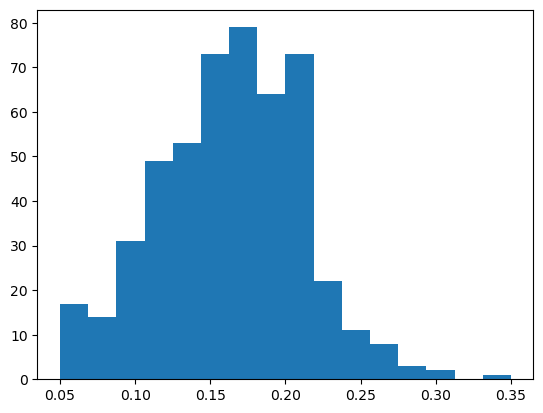

In [50]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
    mean_attritions.append(attrition_pop.sample(n=60)['Attrition'].mean())

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.show()

By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.

As the sample size increases, the range of calculated sample means tends to decrease.


In [51]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(0,500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

    # Print out the first few entries of the list
print(mean_attritions[0:5])

[0.1, 0.18333333333333332, 0.2, 0.13333333333333333, 0.21666666666666667]


Write a function for expand grid

In [59]:
#import itertools

def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

expand_grid(tbl.to_dict(orient='list')).drop_duplicates()

NameError: name 'tbl' is not defined

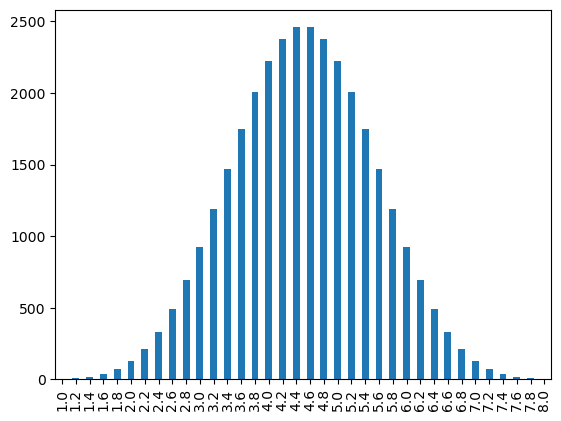

In [61]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind = 'bar')
plt.show()

### Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [1]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)), size = 5, replace = True)
print(five_rolls)

# Print the mean of five_rolls
print(five_rolls.mean())

[2 7 5 3 2]
3.8


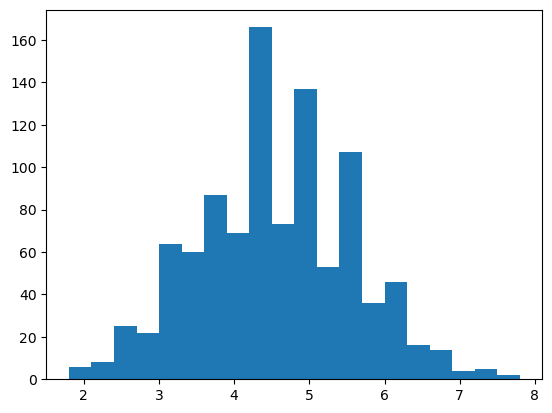

In [7]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins = 20)
plt.show()

Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used. 

The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

### Population & sampling distribution means
One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.


Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean.

Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean.

The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.

The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.

## Bootstrap Distributions

The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

### Generating a bootstrap distribution

In [13]:
spotify_sample = pd.read_feather(r"C:\Users\moket\Personal Practice\spotify_2000_2020.feather")
spotify_sample

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.1100,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.2220,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.4000,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.3500,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.2790,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41651,0.17300,"['DripReport', 'Tyga']",0.875,163800.0,2.730000,0.443,1.0,4KppkflX7I3vJQk7urOJaS,0.000032,1.0,0.0891,-7.461,1.0,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020.0
41652,0.01670,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,2.791133,0.385,0.0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8.0,0.1110,-10.907,1.0,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020.0
41653,0.53800,"['Kygo', 'Oh Wonder']",0.514,180700.0,3.011667,0.539,0.0,52eycxprLhK3lPcRLbQiVk,0.002330,7.0,0.1080,-9.332,1.0,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020.0
41654,0.07140,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,2.788467,0.761,0.0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1.0,0.2220,-2.557,1.0,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020.0


In [17]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
display(spotify_1_resample)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
4081,0.277000,['Khalid'],0.432,231653.0,3.860883,0.520,0.0,2vsuel3g4zaLYSOY0mOMbi,0.371000,1.0,0.1380,-5.515,0.0,Bad Luck,67.0,2019-04-05,0.0548,164.047,0.303,2019.0
20562,0.026000,['The Amity Affliction'],0.498,211520.0,3.525333,0.904,1.0,4vVzmaBsxXuKrJeMSLRF4y,0.000005,6.0,0.0685,-6.351,1.0,Drag the Lake,61.0,2018-08-24,0.0456,133.973,0.343,2018.0
19588,0.001440,['Rise Against'],0.302,207027.0,3.450450,0.906,0.0,2gVuP7yxrIsn2s3i68eHjt,0.000000,1.0,0.0558,-3.387,0.0,The Strength To Go On,46.0,2008-01-01,0.0555,132.746,0.629,2008.0
36846,0.758000,"['Aaron Krause', 'Liza Anne']",0.325,223893.0,3.731550,0.201,0.0,65YDMuJmyF8cxTrk4Xogy0,0.000000,6.0,0.0977,-11.595,0.0,Every Breath You Take (feat. Liza Anne),66.0,2013-11-22,0.0282,81.869,0.172,2013.0
17995,0.001550,['Paramore'],0.277,264205.0,4.403417,0.949,0.0,5rrJOeJ2SMhtQjIPD8kmLr,0.000112,10.0,0.7650,-4.072,0.0,"Decode - Live at Red Rocks Amphitheatre, Morri...",47.0,2013-04-09,0.0919,164.102,0.232,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25392,0.048400,['Counting Crows'],0.555,188387.0,3.139783,0.926,0.0,3OltYYcLZUhvho5QoRbUNr,0.000008,7.0,0.1710,-3.613,1.0,"Accidentally In Love - From ""Shrek 2"" Soundtrack",53.0,2003-01-01,0.0363,138.017,0.771,2003.0
21282,0.108000,['Big & Rich'],0.700,200307.0,3.338450,0.896,0.0,5s7m2xNZWgz5FqVSIvJcGA,0.000000,2.0,0.4530,-2.276,1.0,Save a Horse (Ride a Cowboy),68.0,2004-04-20,0.1910,102.065,0.817,2004.0
14395,0.293000,"['Jonas Blue', 'Liam Payne', 'Lennon Stella']",0.652,193377.0,3.222950,0.897,0.0,1wsLHgXJ4SKIfd5ePSX1hD,0.000000,7.0,0.0722,-4.481,0.0,Polaroid,73.0,2018-10-05,0.0360,114.033,0.475,2018.0
29286,0.000415,['Saliva'],0.487,243600.0,4.060000,0.931,0.0,0U6yXM24WIntZO8HUUMXuj,0.008340,6.0,0.1500,-4.013,1.0,Superstar,54.0,2001-03-27,0.0350,91.800,0.492,2001.0


In [22]:
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5909888203379986


In [23]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1,1001):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5927894252928758, 0.591706123967731, 0.5899803701747681, 0.5905348377184527, 0.5919719800268872, 0.5911223713270555, 0.5903488501056303, 0.590192562896101, 0.5908843239869359, 0.5915332989245216, 0.591314528519304, 0.5904363020933324, 0.5912039634146293, 0.5909536321298228, 0.5917685303437651, 0.5898083949490983, 0.5914345040330293, 0.5920197570578051, 0.5907060303437635, 0.5897463990781622, 0.5891376320337989, 0.5907155727866302, 0.5913477722296887, 0.591359340791241, 0.5917018388707507, 0.5904850225657742, 0.5906468119838647, 0.5912345448434799, 0.5905204844440154, 0.5920747407336266, 0.5908803269637022, 0.5914463150566545, 0.5909840623199557, 0.5919180622239286, 0.5900534640868071, 0.5913944545803723, 0.5919727698290683, 0.5921449659112761, 0.5923461806222339, 0.5919694593815985, 0.589527465431154, 0.592016384194344, 0.5899172268100631, 0.5927433070866113, 0.5907740397541767, 0.5916311479738846, 0.590326793259072, 0.5908794579412299, 0.5906945914153963, 0.5907944137699218, 0.5891

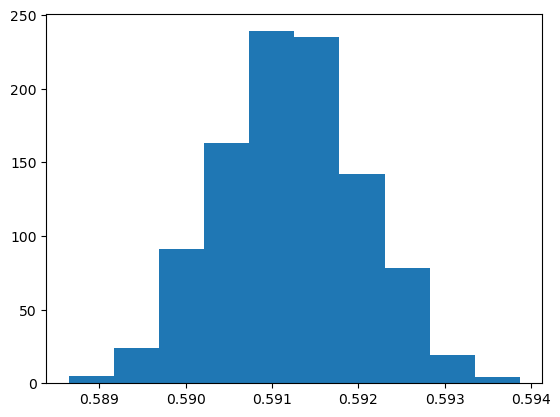

In [24]:
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

Beautiful bootstrapping! From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

### Comparing sampling and bootstrap distributions

 Bootstrap statistics and population statistics
Bootstrap distribution statistics can be used to estimate population parameters. But can you always rely on them to give an accurate estimate of an unknown population parameter?

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the corresponding values of the population?

No, the mean of the bootstrap distribution will always be near the sample mean, which may not necessarily be very close to the population mean.

If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors.

### Sampling distribution vs. bootstrap distribution

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

In [35]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity     
    	spotify_population.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)


[55.2, 54.536, 54.534, 53.854, 54.212, 54.922, 54.624, 54.59, 55.556, 54.62, 54.404, 54.844, 54.816, 54.492, 54.412, 54.542, 54.608, 54.434, 55.936, 55.488, 54.17, 55.582, 53.652, 54.714, 55.384, 54.354, 55.658, 54.374, 53.846, 55.148, 54.808, 54.924, 54.526, 54.446, 55.094, 54.49, 55.784, 54.802, 55.368, 55.174, 55.248, 55.02, 54.302, 54.828, 55.358, 54.924, 55.37, 55.284, 55.396, 54.988, 53.802, 55.05, 54.254, 54.416, 54.768, 54.806, 54.68, 55.23, 54.984, 53.992, 54.986, 55.266, 54.096, 55.0, 54.632, 54.882, 53.696, 55.19, 54.804, 54.67, 55.932, 55.252, 54.664, 54.164, 54.242, 55.202, 54.544, 54.854, 54.88, 54.442, 54.512, 54.76, 54.72, 54.888, 54.768, 54.72, 54.362, 55.612, 54.914, 55.916, 54.72, 54.85, 54.89, 54.512, 55.064, 53.762, 54.954, 55.094, 55.004, 55.008, 54.928, 55.012, 54.698, 54.526, 54.144, 55.5, 54.462, 54.792, 55.862, 54.808, 55.038, 54.988, 54.712, 54.074, 54.484, 55.518, 54.704, 54.252, 55.082, 54.762, 54.526, 55.794, 53.904, 55.06, 56.192, 54.972, 55.072, 54.574, 

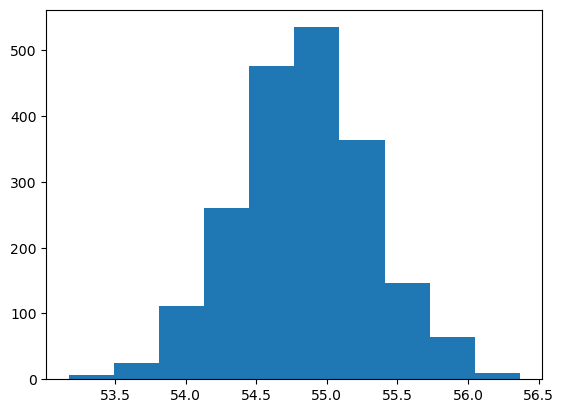

In [34]:
# Draw a sampling distribution results
plt.hist(mean_popularity_2000_samp)
plt.show()

In [29]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[54.82, 55.218, 54.734, 54.694, 55.294, 53.586, 54.774, 54.63, 54.67, 55.098, 54.402, 55.012, 54.664, 54.288, 54.896, 55.11, 54.144, 54.956, 54.352, 55.48, 55.53, 54.178, 54.062, 54.984, 55.432, 55.554, 54.414, 55.042, 54.496, 54.946, 54.126, 54.988, 55.058, 54.052, 54.784, 55.142, 55.26, 55.496, 54.912, 54.292, 55.384, 54.246, 55.16, 53.404, 55.084, 55.816, 55.036, 55.064, 55.062, 54.434, 54.76, 53.978, 54.482, 54.982, 54.746, 55.236, 55.582, 55.398, 54.476, 54.64, 55.086, 55.368, 55.394, 54.726, 54.866, 55.692, 54.668, 54.29, 54.454, 53.858, 54.824, 54.864, 54.738, 55.034, 55.4, 54.786, 54.516, 54.736, 54.972, 54.238, 54.364, 54.422, 54.988, 55.534, 55.15, 54.792, 54.382, 55.302, 54.578, 54.776, 55.276, 55.016, 55.172, 54.754, 54.804, 55.264, 55.386, 55.124, 54.786, 55.674, 54.432, 55.082, 54.432, 54.69, 54.874, 54.722, 55.16, 54.206, 55.094, 55.034, 55.168, 54.938, 54.172, 54.962, 54.282, 54.208, 55.008, 54.916, 55.386, 55.492, 55.538, 54.43, 55.286, 55.182, 55.362, 55.018, 56.02, 5

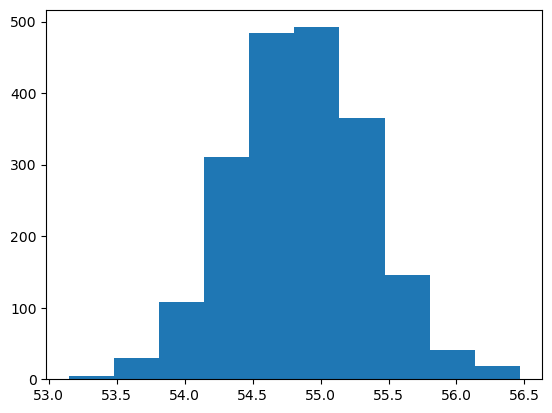

In [33]:
# Draw a histogram of the bootstrap distribution results
plt.hist(mean_popularity_2000_boot)
plt.show()

In [39]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.837142308430955, 54.846990999999996, 54.855322]


The sampling distribution mean is the best estimate of the true population mean; the bootstrap distribution mean is closest to the original sample mean.

The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

In [48]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Print the standard deviations
print([pop_sd, samp_sd])

[10.880065274257204, 10.88019587082396]


 When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.
     
The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

### Confidence interval 

Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range

Confidence interval interpretation
When reporting results, it is common to provide a confidence interval alongside an estimate.

What information does that confidence interval provide?  --> 

A range of plausible values for an unknown quantity.

### Calculating confidence intervals

In [54]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(mean_popularity_2000_boot, 0.025)
upper_quant = np.quantile(mean_popularity_2000_boot, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.8918, 55.83805)


In [58]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_2000_boot)
standard_error = np.std(mean_popularity_2000_boot, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(53.885706042639626, 55.824937957360376)


The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal. This assumption should hold if the sample size and number of replicates are sufficiently large.